In [1]:
import matplotlib.pyplot as plt
from keras.models import load_model
from mtcnn.mtcnn import MTCNN
from PIL import Image
import numpy as np

Using TensorFlow backend.


In [2]:
gender_model = load_model("../gender_model.h5")

In [3]:
detector = MTCNN()

In [32]:
pixels = plt.imread("arnold.jpg")
results = detector.detect_faces(pixels)

In [33]:
imshape =  pixels.shape
# extract the bounding box from the first face
x1, y1, width, height = results[0]['box']
x2, y2 = int(x1 + width), int(y1 + height)
x1 = int(0.5*x1)
y1 = int(0.5*y1)
x2 = int(x2+0.5*(imshape[1]-x2))
y2 = int(y2+0.5*(imshape[0]-y2))
# extract the face
face = pixels[y1:y2, x1:x2]
# resize pixels to the model size
image = Image.fromarray(face)
image = image.resize((224, 224))
face_array = np.asarray(image)

In [34]:
face_array.shape

(224, 224, 3)

In [35]:
new_face = face_array.reshape(-1,224,224,3)
new_face.shape

(1, 224, 224, 3)

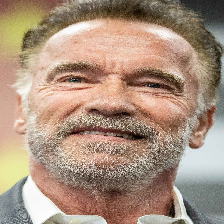

In [36]:
Image.fromarray(face_array)

In [37]:
gen = gender_model.predict(new_face)

In [38]:
gen[0][0] == 1

True